In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 
import cv2
import os

# Read Seis

In [2]:
seis = np.fromfile('/home/zhangzr/FaultRecongnition/Fault_data/real_data/seis.dat', dtype=np.single)
seis = seis.reshape(101,1201,2751)
# seis = (seis - np.mean(seis)) / np.std(seis)

# Visualize Predictions

In [3]:
s4_pred = np.fromfile('/home/zhangzr/FaultRecongnition/pytorch3dunet/3dunet-pdo/Predict-pdo/real/s4_unet_3d_predict.bin', dtype=np.single)
s4_pred = s4_pred.reshape(101,1201,2751)
pred = np.fromfile('/home/zhangzr/FaultRecongnition/pytorch3dunet/3dunet/3DUnet-Predict/real/unet_3d_predict.bin', dtype=np.single)
pred = pred.reshape(101,1201,2751)

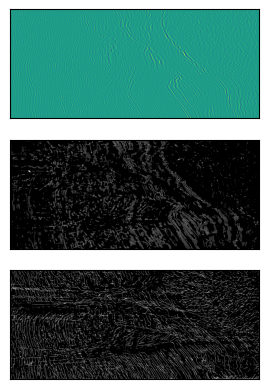

In [4]:
slice_id = 50
plt.subplot(3,1,1)
fig = plt.imshow(seis[slice_id,:,:])
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(3,1,2)
fig = plt.imshow(1-s4_pred[slice_id,:,:], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(3,1,3)
fig = plt.imshow(1-pred[slice_id,:,:], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.show()

In [5]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2 - cropx//2
    starty = y//2 - cropy//2    
    return img[starty:starty+cropy, startx:startx+cropx]

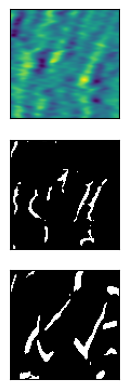

In [6]:
slice_id = 500
plt.subplot(3,1,1)
fig = plt.imshow(crop_center(seis[:,slice_id,:], 101, 101))
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(3,1,2)
fig = plt.imshow(1-crop_center(s4_pred[:,slice_id,:], 101, 101), cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(3,1,3)
fig = plt.imshow(1-crop_center(pred[:,slice_id,:], 101, 101), cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.show()

# Simulate data 3D

In [7]:
ids = 19
with h5py.File(f'/home/zhangzr/FaultRecongnition/Fault_data/hdf5/val/{ids}.h5', 'r') as f:
    seis = f['raw'][:]
    gt = f['label'][:][0,:,:,:]

with h5py.File(f'/home/zhangzr/FaultRecongnition/pytorch3dunet/3dunet-pdo/Predict-pdo/{ids}_predictions.h5', 'r') as f:
    s4_pred = f['predictions'][:][0,:,:,:]

with h5py.File(f'/home/zhangzr/FaultRecongnition/pytorch3dunet/3dunet/3DUnet-Predict/{ids}_predictions.h5', 'r') as f:
    pred = f['predictions'][:][0,:,:,:]

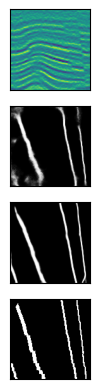

In [19]:
slice_id = 100
plt.subplot(4,1,1)
fig = plt.imshow(seis[:,slice_id,:])
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(4,1,2)
fig = plt.imshow(1-s4_pred[:,slice_id,:], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(4,1,3)
fig = plt.imshow(1-pred[:,slice_id,:], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(4,1,4)
fig = plt.imshow(1-gt[:,slice_id,:], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.show()

# Simulate Data 2d

In [9]:
data_root_dir = '/home/zhangzr/FaultRecongnition/Fault_data/2d-simulate-data'
pred_root_dir = '/home/zhangzr/FaultRecongnition/mmsegmentation-master/test_results/upernet_swin_base_patch4_window7_128x128_less_aug'
cube_id = 0
slice_id = 100
split = 'train'
seis = cv2.imread(os.path.join(data_root_dir, split, 'image', f'cube_{cube_id}_slice_{slice_id}.png'), cv2.IMREAD_UNCHANGED)
gt = cv2.imread(os.path.join(data_root_dir, split, 'ann', f'cube_{cube_id}_slice_{slice_id}.png'), cv2.IMREAD_UNCHANGED)
pred = cv2.imread(os.path.join(pred_root_dir, f'cube_{cube_id}_slice_{slice_id}.png'), cv2.IMREAD_UNCHANGED)


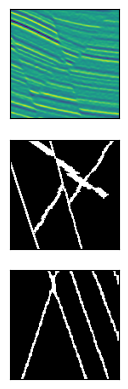

In [10]:
plt.subplot(3,1,1)
fig = plt.imshow(seis)
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(3,1,2)
fig = plt.imshow(1-gt, cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(3,1,3)
fig = plt.imshow(1-pred, cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.show()